<a href="https://colab.research.google.com/github/KaiAlan/ML_Notebooks/blob/Ml_tryl/Graph_Viz_with_Nodes_and_Edge_Lables_%26_Nodes_Adjacency_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Example Graph

False
False


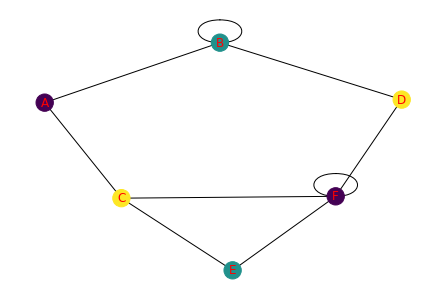

In [30]:
#G = nx.DIGraph() # for Laplacian Matrix you can not use the Directed Graph
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('C', 'F'),
     ('E', 'F'), ('D', 'F'),
     ('B', 'B'), ('F', 'F')]
)

val_map = {'A': 1.0,
           'B': 2.0,
           'C': 3.0,
           'D': 3.0, 'E': 2.0, 'F': 1.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='red')

print(nx.is_weighted(G))
print(nx.is_directed(G))

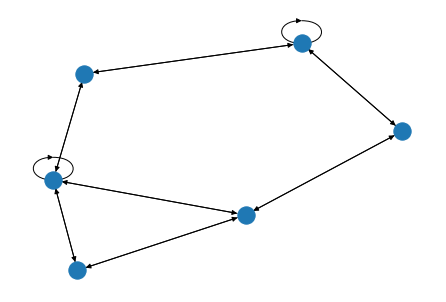

In [32]:
#Trick
nx.draw(G.to_directed())

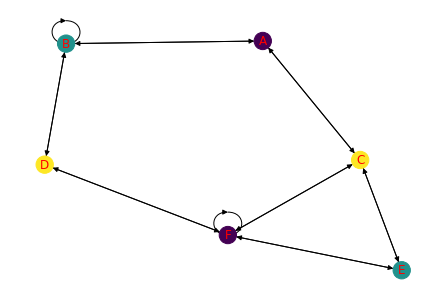

In [33]:
nx.draw(G.to_directed(), cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='red')

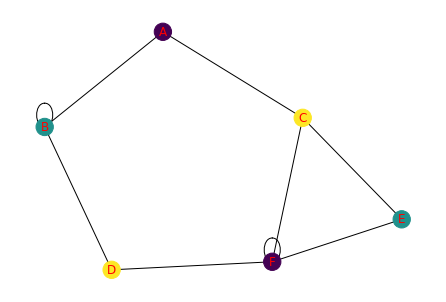

In [34]:
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='red')

In [36]:
I = nx.incidence_matrix(G)

In [37]:
I.todense()

matrix([[1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0.]])

#Rendering all Nodes and Edges

In [40]:
edge_labels = {
    ('A', 'B'): 'e1', ('A', 'C'): 'e2', ('B', 'D'): 'e3', ('C', 'E'): 'e4', ('C', 'F'): 'e5',
     ('E', 'F'): 'e6', ('D', 'F'): 'e7',
     ('B', 'B'): 'e8', ('F', 'F'): 'e9'
}

all_edges = (
    [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('C', 'F'),
     ('E', 'F'), ('D', 'F'),
     ('B', 'B'), ('F', 'F')]
)

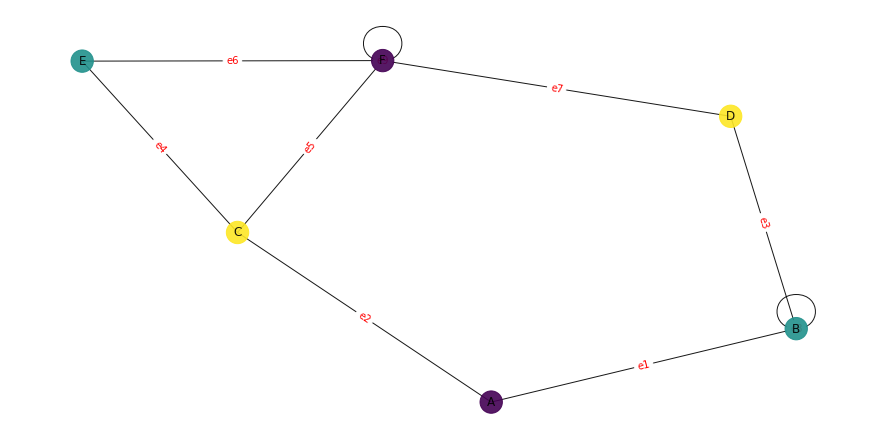

False
False


In [46]:
#G = nx.DIGraph() # for Laplacian Matrix you can not use the Directed Graph
G = nx.Graph()
G.add_edges_from(all_edges)

val_map = {'A': 1.0,
           'B': 2.0,
           'C': 3.0,
           'D': 3.0, 'E': 2.0, 'F': 1.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

pos = nx.spring_layout(G)
plt.figure(figsize = (12, 6))
nx.draw(
    G, pos, edge_color = 'black', width = 1, linewidths = 1,
    node_size = 500, node_color = values, alpha = 0.9,
    labels = {node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels = edge_labels,
    font_color = 'red'
)

plt.axis('off')
plt.show()
print(nx.is_weighted(G))
print(nx.is_directed(G))


In [47]:
print(G.number_of_nodes())
print(G.number_of_edges())

6
9


In [49]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 1., 0., 0., 0.],
        [1., 1., 0., 1., 0., 0.],
        [1., 0., 0., 0., 1., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 1., 1., 1., 1.]])

In [48]:
nx.to_numpy_matrix(G.to_directed())

matrix([[0., 1., 1., 0., 0., 0.],
        [1., 1., 0., 1., 0., 0.],
        [1., 0., 0., 0., 1., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 1., 1., 1., 1.]])

#Adjacency Matrix

In [50]:
A = nx.adjacency_matrix(G)

In [51]:
A.todense()

matrix([[0, 1, 1, 0, 0, 0],
        [1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 1, 1],
        [0, 1, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 1],
        [0, 0, 1, 1, 1, 1]])

In [52]:
A.diagonal()

array([0, 1, 0, 0, 0, 1])

In [53]:
for line in nx.generate_adjlist(G):
  print(line)
#Not work properly when showing adjecent nodes list

A B C
B D B
C E F
D F
E F
F F


#Listing all Adjecent Nodes

In [57]:
def get_adjacent_list_with_all_edges(graph_val):
  for s, neighbours in graph_val.adjacency():
    line = str(s) +  ' : '
    for t, data in neighbours.items():
      line += str(t) + ' - '
    yield line[: -len(' ')]

In [58]:
for line in get_adjacent_list_with_all_edges(G):
  print(line)

A : B - C -
B : A - D - B -
C : A - E - F -
D : B - F -
E : C - F -
F : C - E - D - F -


#Incidence Matrix

In [59]:
I = nx.incidence_matrix(G)

In [60]:
I.todense()

matrix([[1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0.]])

#Node Degree

In [61]:
G.degree()

DegreeView({'A': 2, 'B': 4, 'C': 3, 'D': 2, 'E': 2, 'F': 5})

#Laplacian Matrix

In [62]:
L = nx.laplacian_matrix(G)

In [63]:
L.todense()

matrix([[ 2, -1, -1,  0,  0,  0],
        [-1,  2,  0, -1,  0,  0],
        [-1,  0,  3,  0, -1, -1],
        [ 0, -1,  0,  2,  0, -1],
        [ 0,  0, -1,  0,  2, -1],
        [ 0,  0, -1, -1, -1,  3]])